In [1]:
import numpy as np

In [20]:
import lib.haar_wawelet_method.haar as haar
import lib.data as data
import lib.mesurements as msrm
import lib.gradients as gr
import numpy as np
def get_all(func, grad_x, grad_y, x_s, x_e, y_s, y_e, M, LL_0 = 1.0):
    """
        Функция возвращает основную статистику о работе метода.
        func - функция, которую необходимо восстановить
        grad_x - функция, градиент по x, в явном виде.
        grad_y - функция, градиент по y, в явном виде.
        x_s, x_e, y_s, y_e, M - задают сетку на которой будут вычислены значения функций.
        x_s - x start , начальная точка x
            x_e - x end, конечная точка x
            y_s - y start, начальная точка y
            y_e - конечная точка y
            M - определяет размерность матрицы. Она будет равна 2^M * 2^M
            ---------->x -расположение осей.
            |
            |
            |
            |
            \/
            y
    """
    x,y = data.get_plane(x_s,x_e,y_s,y_e,M)
    res = dict()
    h = (x_e - x_s) / 2**M
    res['orig'] = func(x,y)
    res['grX'] = grad_x(x,y) * h
    res['grY'] = grad_y(x,y) * h
    res['X_H'] = res['grX'][::,:-1:]
    res['Y_H'] = res['grY'][:-1:,::]
    res['X_F'] = res['grX'][:-1:,:-1:]
    res['Y_F'] = res['grY'][:-1:,:-1:]
    LL = LH = HL = HH = dict()
    LL[0] = np.array([[np.mean(res['orig']) * (2 ** M)]])
    res['LL_0'] = np.array([[np.mean(res['orig']) * (2 ** M)]])
    LH, HL, HH = haar.analyze(res['grX'],res['grY'], res['grX'], res['grY'])
    LL = haar.syntesis(LL,LH, HL, HH, M)
    res['LL'] = LL
    res['LH'] = LH
    res['HL'] = HL
    res['HH'] = HH
    res['mse'] = msrm.mse(res['orig'], LL[M])
    res['M'] = M
    return res

In [21]:
import matplotlib.pyplot as plt
import lib.gradients as gr
import lib.mesurements as msrm
import numpy as np

def show_all(func, grad_x, grad_y, x_s, x_e, y_s, y_e, M,LL_0=1):
	"""
	Визулизация функции test.get_all.
	Принимает те же параметры, что и get_all
	Отрисовывает исходную и восстновленную функции.
	Выводит статистику.
	Возвращает результат функции get_all 
	"""
	res = get_all(func, grad_x, grad_y, x_s, x_e, y_s, y_e, M, LL_0)
	f, axarr = plt.subplots(1,2,figsize=(15,15))
	axarr[0].set_title('восстановленное')
	axarr[0].imshow(res['LL'][res['M']], cmap="gray")
	axarr[1].set_title('исходное')
	axarr[1].imshow(res['orig'], cmap = 'gray')
	print("MSE = ", res['mse'])
	print("M = ", res['M'])
	X_H, Y_H = gr.Hudgin_gradien_model(res['orig'])
	X_F, Y_F = gr.fried_model_gradient(res['orig'])
	print( "Погрешность X_H=", msrm.mse( X_H[::,:-1:], res['X_H']) )
	print( "Погрешность Y_H=", msrm.mse( Y_H[:-1:,::], res['Y_H']) )
	print( "Погрешность X_F=", msrm.mse( X_F[:-1:,:-1:], res['X_F']) )
	print( "Погрешность Y_F=", msrm.mse( Y_F[:-1:,:-1:], res['Y_F']) )
	print( "LL[0] исходного изображения ", res['LL_0'] )
	print( "LL[0] восстновленного изображения ", np.mean( res['LL'][res['M']] ) * (2**res['M']) )
	print( "Максимум исходного изображения", np.max(res['orig']))
	print( "Максимум восстновленного изображения", np.max(res['LL'][res['M']]))
	print( "Минимум исходного изображения", np.min(res['orig']))
	print( "Минимум восстновленного изображения", np.min(res['LL'][res['M']]))
	return res
%matplotlib inline

MSE =  0.33504822875200724
M =  8
Погрешность X_H= 0.006680110750737525
Погрешность Y_H= 0.006680110750737525
Погрешность X_F= 0.006693196190801408
Погрешность Y_F= 0.0066931961908014035
LL[0] исходного изображения  [[1040104.57452011]]
LL[0] восстновленного изображения  1040104.5745201078
Максимум исходного изображения 20000.0
Максимум восстновленного изображения 20251.05952587366
Минимум исходного изображения 4.730088581255685e-06
Минимум восстновленного изображения 15.459040389196721


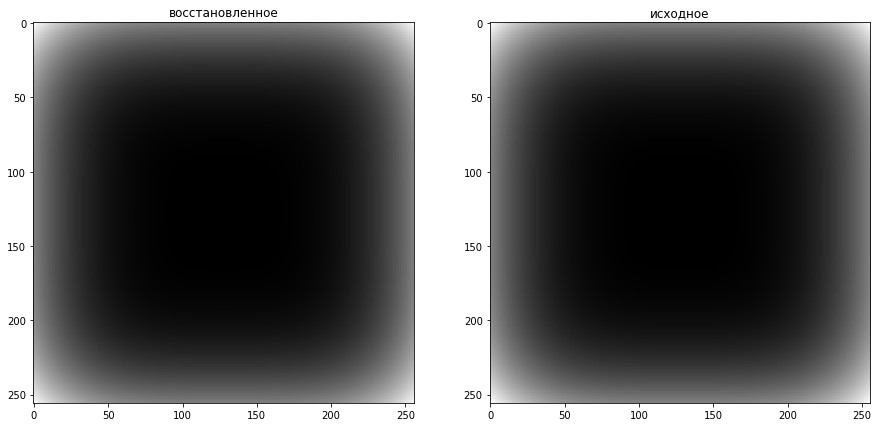

In [22]:
res1 = show_all(lambda x,y: x**4 + y**4, lambda x,y: 4*x**3, lambda x,y: 4*y**3, -10,10,-10,10, 8,)

MSE =  0.0025841698880048553
M =  8
Погрешность X_H= 2.769225398344157e-05
Погрешность Y_H= 2.7692253983441566e-05
Погрешность X_F= 2.774649939092869e-05
Погрешность Y_F= 2.7746499390928704e-05
LL[0] исходного изображения  [[17200.52287582]]
LL[0] восстновленного изображения  17200.52287581701
Максимум исходного изображения 200.0
Максимум восстновленного изображения 201.0437091503269
Минимум исходного изображения 0.0030757400999615312
Минимум восстновленного изображения 0.259395424836694


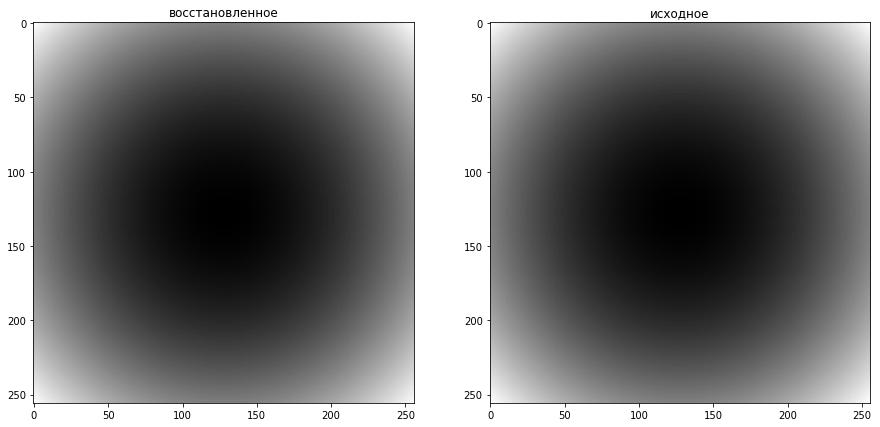

In [23]:
res1 = show_all(lambda x,y: x**2 + y**2, lambda x,y: 2*x, lambda x,y: 2*y, -10,10,-10,10, 8,1400)

MSE =  0.135172227985497
M =  8
Погрешность X_H= 0.00069501730989457
Погрешность Y_H= 0.00069501730989457
Погрешность X_F= 0.0013873249695464328
Погрешность Y_F= 0.0013873249695464322
LL[0] исходного изображения  [[-6.1817218e-13]]
LL[0] восстновленного изображения  1.2732925824820995e-11
Максимум исходного изображения 10000.0
Максимум восстновленного изображения 10039.0625
Минимум исходного изображения -10000.0
Минимум восстновленного изображения -9960.9375


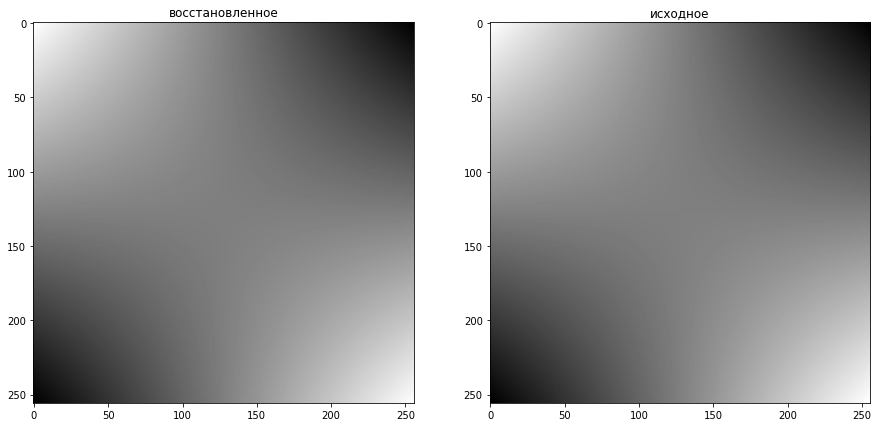

In [24]:
res2 = show_all(lambda x,y: x*y, lambda x,y: y, lambda x,y: x, -100,100,-100,100, 8)

MSE =  1.9506446310319583
M =  8
Погрешность X_H= 0.04165004105184876
Погрешность Y_H= 0.04165004105184876
Погрешность X_F= 0.04173162789017818
Погрешность Y_F= 0.04173162789017818
LL[0] исходного изображения  [[2.27373675e-13]]
LL[0] восстновленного изображения  0.999999999996362
Максимум исходного изображения 99.99846212995001
Максимум восстновленного изображения 1285.0235140931368
Минимум исходного изображения -99.99846212995001
Минимум восстновленного изображения -1285.0157015931368


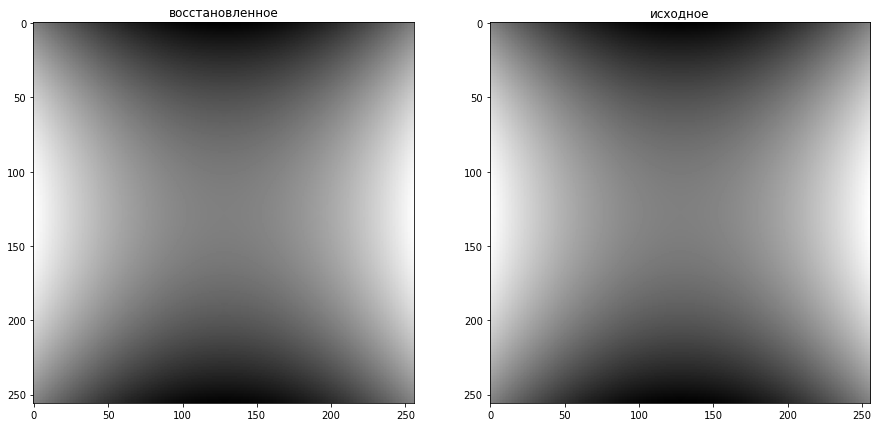

In [10]:
res3 = show_all(lambda x,y: x**2 - y**2, lambda x,y: 2*x, lambda x,y: -2*y, -10,10,-10,10, 8)

MSE =  0.14134980034055053
M =  8
Погрешность X_H= 0.0027427793080066136
Погрешность Y_H= 0.0027427793080066136
Погрешность X_F= 0.0027512215364793187
Погрешность Y_F= 0.0027512215364793187
LL[0] исходного изображения  [[196.65714983]]
LL[0] восстновленного изображения  1.0000000000002274
Максимум исходного изображения 1.4142135623730951
Максимум восстновленного изображения 83.07724041798616
Минимум исходного изображения 0.005545935538718
Минимум восстновленного изображения -97.96153913372564


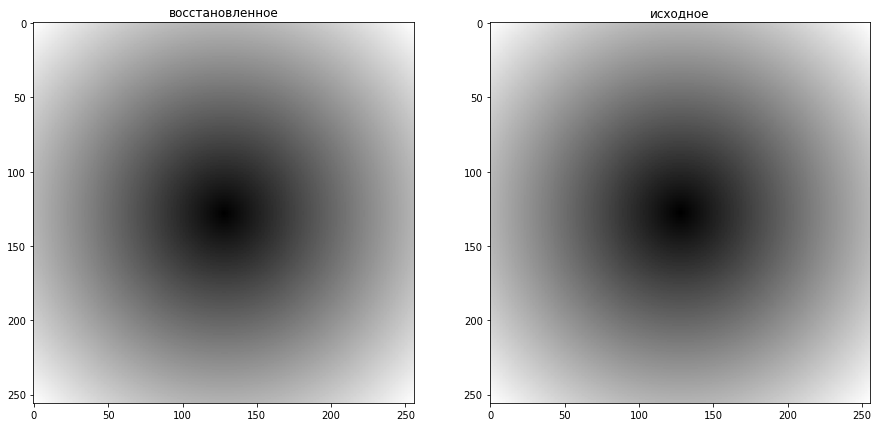

In [11]:
res4 = show_all(lambda x,y:np.sqrt(x**2 + y**2),lambda x,y: x/(np.sqrt(x**2 + y**2)),
                     lambda x,y: y/(np.sqrt(x**2 + y**2)), -1,1,-1,1,8 ,1)

MSE =  0.420003376637399
M =  8
Погрешность X_H= 0.008968017966102351
Погрешность Y_H= 0.008968017966102351
Погрешность X_F= 0.008985585109218127
Погрешность Y_F= 0.008985585109218127
LL[0] исходного изображения  [[88.01045752]]
LL[0] восстновленного изображения  88.00000000000091
Максимум исходного изображения 3.0
Максимум восстновленного изображения 343.0104166666667
Минимум исходного изображения -0.9999384851980008
Минимум восстновленного изображения -170.99742647058818


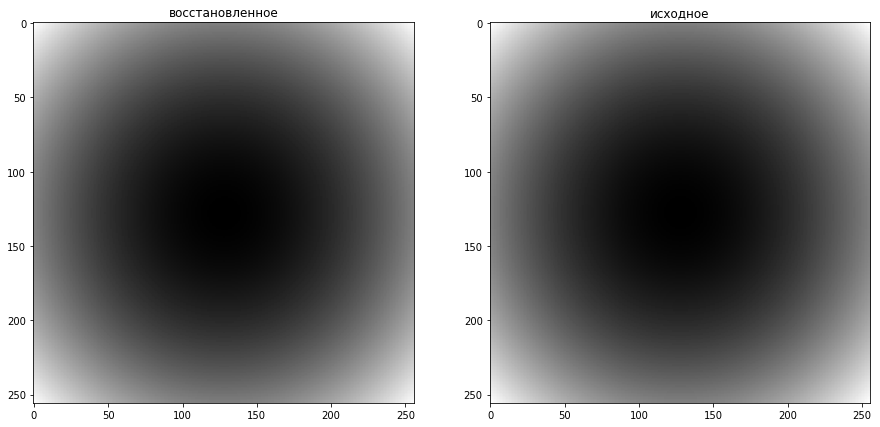

In [12]:
res5 = show_all(lambda x,y:2*(x**2 + y**2) - 1,lambda x,y: 4*x,
                     lambda x,y: 4*y, -1,1,-1,1,8,88 )

In [13]:
res6 = view.show_all(lambda x,y:(x**2 + y**2)*np.sqrt(x**2 + y**2), 
                    lambda x,y: 2*x*np.sqrt(x**2 + y**2) + x**3/(np.sqrt(x**2 + y**2)) + x*y**2/np.sqrt(x**2 + y**2),
                    lambda x,y:2*y*np.sqrt(x**2 + y**2) + y**3/(np.sqrt(x**2 + y**2)) + y*x**2/np.sqrt(x**2 + y**2),
                    -1,1,-1,1,8)

NameError: name 'view' is not defined

In [ ]:
res7 = show_all(lambda x,y: x-y, lambda x,y: np.zeros(x.shape) + 1, lambda x,y:np.zeros(y.shape) - 1, -1,1,-1,1,8)

In [ ]:
res8 = show_all(lambda x,y:3*(x**2 + y**2)*np.sqrt(x**2 + y**2) - 2*np.sqrt(x**2 + y**2),
                    lambda x,y:(9*x**3 + 6*x*y**2 + 3*x*y**2 - 2*x)/np.sqrt(x**2 + y**2),
                    lambda x,y:(9*y**3 + 6*y*x**2 + 3*x**2*y - 2*y)/np.sqrt(x**2 + y**2),
                    -1,1,-1,1,8,10)